In [2]:
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [3]:
data = pd.read_csv("IPL 2022.csv")
data

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [4]:
print(data.isnull().sum())

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64


In [5]:
data.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


In [6]:
High_score = data.sort_values(by=["highscore"])
High_score = High_score
print(High_score['top_scorer'])

5     Sherfane Rutherford
58               MS Dhoni
73           Shubman Gill
41        Quinton de Kock
35        Abhishek Sharma
             ...         
36               KL Rahul
72            Jos Buttler
71          Rajat Patidar
33            Jos Buttler
65        Quinton de Kock
Name: top_scorer, Length: 74, dtype: object


In [ ]:
data['won_by'] = data['won_by'].map({'Wickets': 'Chasing', 'Runs': 'Defending'})

won_by = data['won_by'].value_counts()
label = won_by.index
counts = won_by.values

colors = ['#1f77b4', '#ff7f0e']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Number of Matches Won by Defending and Chasing")
fig.update_traces(
    hoverinfo="label+percent", 
    textinfo="value", 
    textfont_size=15,
    marker=dict(colors=colors, line=dict(color="black", width=3))
)
fig.show()

In [ ]:
figure = px.bar(data,
                y=['best_bowling'],
                title="Best Bowler in the ipl"
                )
figure.show()

In [ ]:
figure = px.bar(data,
                x=['player_of_the_match'],
                title="player of the match in the ipl"
                )
figure.show()

In [ ]:
figure = px.bar(data,
                x=data["top_scorer"],
                y=data["highscore"],
                color=data['highscore'],
                title="Top score in the ipl"
            )
figure.show()

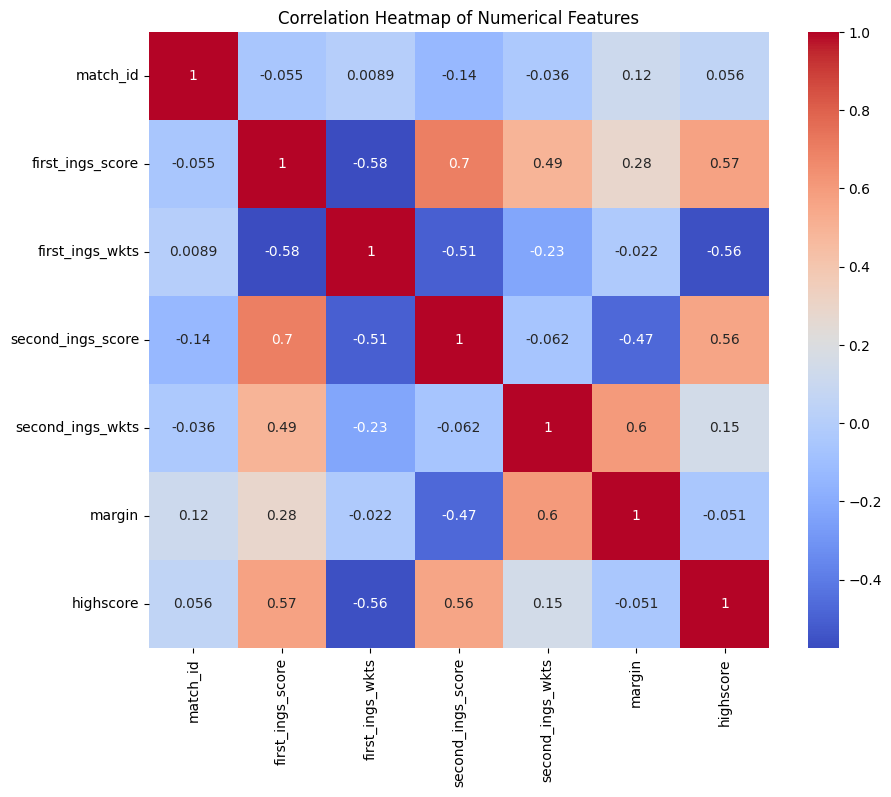

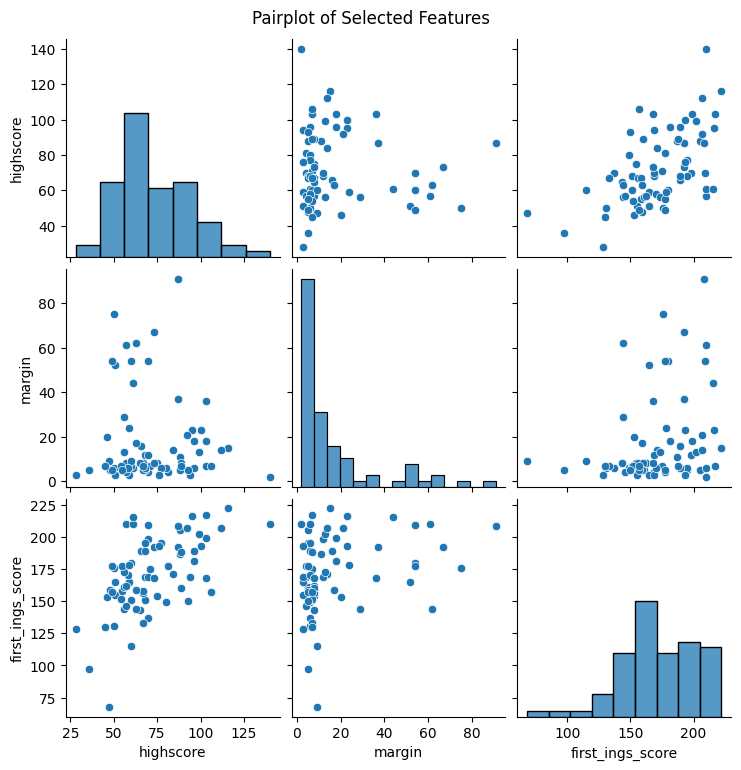

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numerical columns
corr = data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Pairplot for selected features (if not too many)
selected_columns = ['highscore', 'margin', 'first_ings_score']
sns.pairplot(data[selected_columns].dropna())
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()